# 1. Introduction and System Requirements

## 1.1 Problem Statement

The researcher faces a significant imbalanced classification challenge with the following characteristics:
- Dataset size: ~1 million rows
- Feature space: 30 features
- Class distribution: Highly imbalanced (97% negative, 3% positive)

This imbalance represents a fundamental systems challenge that affects all aspects of the machine learning pipeline. When positive examples are rare, standard training approaches often produce models that simply predict the majority class, achieving high accuracy but failing to identify the minority class cases of interest.

A systematic approach is required because this problem impacts:
1. Data preprocessing and sampling strategies
2. Model architecture and learning dynamics
3. Evaluation metrics and validation approaches
4. Infrastructure requirements and computational efficiency

Below is a visualization of the class imbalance that illustrates the magnitude of the challenge:

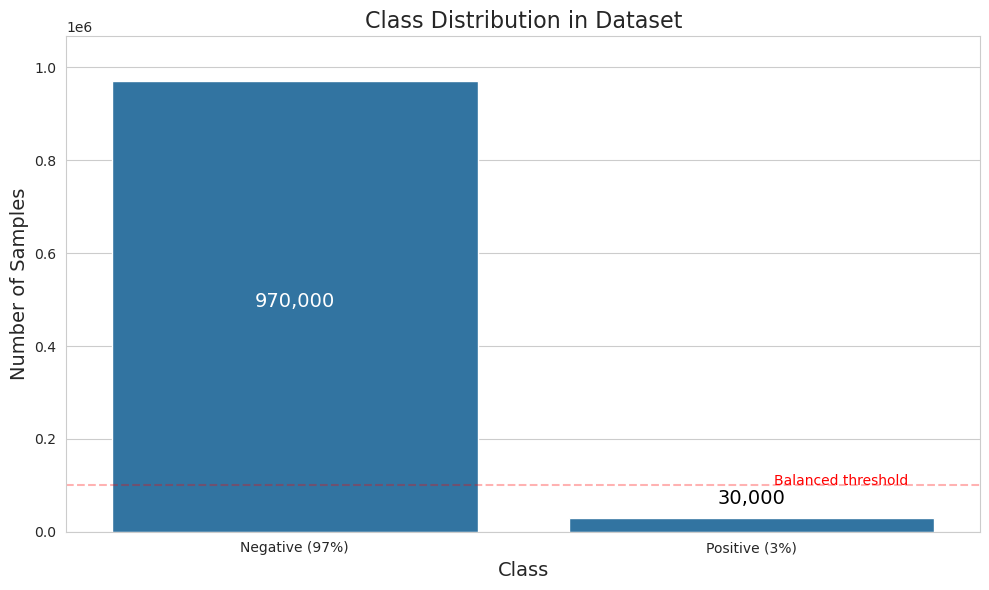

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Sample data reflecting the class imbalance
class_counts = [970000, 30000]  # 97% negative, 3% positive
class_names = ['Negative (97%)', 'Positive (3%)']

# Create visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=class_names, y=class_counts)
plt.title('Class Distribution in Dataset', fontsize=16)
plt.ylabel('Number of Samples', fontsize=14)
plt.xlabel('Class', fontsize=14)

# Add text annotations - adjusted for visibility
plt.text(0, class_counts[0]/2, f'{class_counts[0]:,}', ha='center', fontsize=14, color='white')
plt.text(1, class_counts[1] + 30000, f'{class_counts[1]:,}', ha='center', fontsize=14, color='black')

# Add a horizontal line to emphasize the imbalance
plt.axhline(y=100000, color='red', linestyle='--', alpha=0.3)
plt.text(1.05, 100000, 'Balanced threshold', color='red')

# Adjust y-axis to make sure all elements are visible
plt.ylim(0, 1.1 * max(class_counts))

plt.tight_layout()
plt.show()

## 1.2 Requirements Analysis

### Functional Requirements
- Address classification with severe class imbalance (3% positive clss)
- Support deep learning approaches for the classification task
- Process large-scale dataset (~1M rows with 30 features)
- Enable effective identification of minority class instances
- Provide framework for model development and evaluation

### Performance Requirements
- Balance model performance metrics against the class imbalance challenge
- Optimize for appropriate evaluation metrics beyond simple accuracy
- Ensure computational efficiency for handling the large dataset size
- Support iterative experimentation and model refinement
- Maintain performance with scalable approaches as dataset grows

### Stakeholder Considerations
- Researcher with deep learning interest but limited experience in implementation
- Need for guidance on starting points for model development
- Requirements for reproducible research methodology
- Data handling needs for the class imbalance problem
- Workflow integration for research context

## 1.3 System Constraints and Considerations

### Technical Constraints
- Dataset size (~1M rows) requires efficient data processing strategies
- 30-dimensional feature space may present challenges for visualization and interpretation
- Severe class imbalance (3% positive) impacts model training dynamics
- Computing resources must be suitable for deep learning with large datasets

### Design Considerations for Class Imbalance
- Sampling approaches to address the 97%/3% class distribution
- Loss function selection to properly weight minority class examples
- Feature engineering impact on class separability
- Model architecture implications for imbalanced learning

### Reproducibility Requirements
- Experiment tracking and version control for models and data
- Documentation of preprocessing steps and hyperparameters
- Validation strategy appropriate for imbalanced data
- Consistent evaluation framework across iterations

### Research Workflow Integration
- Integration with existing data analysis pipelines
- Compatibility with research reporting requirements
- Support for iterative exploration and experimentation
- Knowledge transfer potential for similar imbalanced problems

Accuracy: 0.970
Precision: 0.000
Recall: 0.000
F1 Score: 0.000


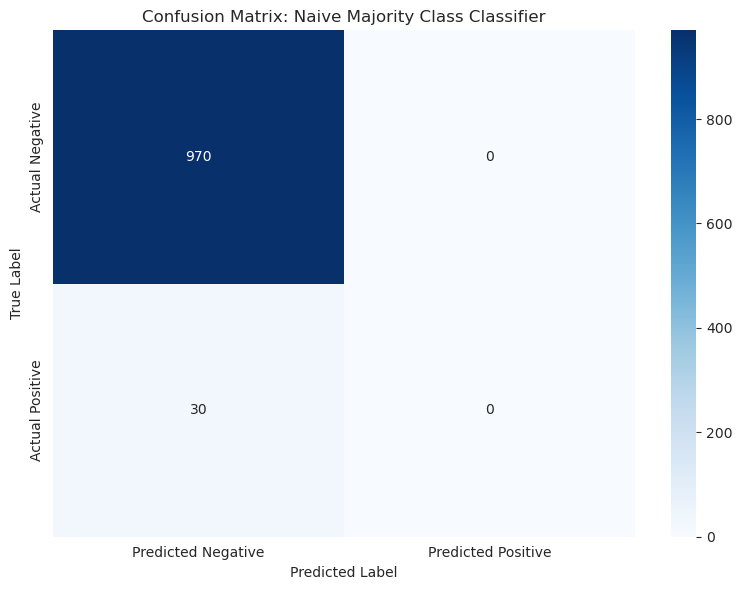

In [9]:
# Demonstrating why accuracy is misleading for imbalanced classification
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate a naive classifier that always predicts the majority class
y_true = np.array([0] * 970 + [1] * 30)  # 1000 samples with 3% positive class
y_pred_naive = np.zeros(1000)  # Always predict majority class

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred_naive)
precision = precision_score(y_true, y_pred_naive, zero_division=0)
recall = recall_score(y_true, y_pred_naive)
f1 = f1_score(y_true, y_pred_naive, zero_division=0)

# Display results
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Visualize confusion matrix
cm = confusion_matrix(y_true, y_pred_naive)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix: Naive Majority Class Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

### Imbalanced Classification Metrics Legend

- **Accuracy**: Proportion of correct predictions (TP+TN)/(TP+TN+FP+FN); misleading for imbalanced data as predicting all majority class can give high accuracy
- **Precision**: Proportion of true positives among positive predictions TP/(TP+FP); measures how many predicted positives are actually positive
- **Recall**: Proportion of true positives identified TP/(TP+FN); measures how many actual positives are correctly identified
- **F1 Score**: Harmonic mean of precision and recall; balances the trade-off between precision and recall
- **Confusion Matrix**: Table showing predicted vs. actual class assignments:
  - True Positive (TP): Correctly predicted positive class
  - False Positive (FP): Incorrectly predicted positive class
  - True Negative (TN): Correctly predicted negative class
  - False Negative (FN): Incorrectly predicted negative class

### Why Deep Learning is Appropriate but Challenging

Deep learning offers several advantages for this classification problem:
- Ability to autmomatically learn complex patterns from high-dimensional data
- Capacity to process large datasets efficiently with proper infrastructure
- Flexibility in architecture design to address specific challenges
- Strong performance on similar classification tasks when properly configured

However, deep learning presents unique challenges with imbalanced data:
- Neural networks tend to bias toward majority class during training
- Optimization can converge to local minima that ignore minority class
- Traditional loss functions may not adequately penalize minority class errors
- Requires careful design of architecture, loss functions, and training procedures

# 2. Data Processing Subsystem

This section outlines the architectural approach for processing the imbalanced dataset (~1M rows, 30 features, 3% positive class). The design addresses three key challenges: handling the class imbalance, ensuring scalability for the large dataset, and maintaining reproducibility throughout the data pipeline.

## 2.1 Data Flow Architecture

The data processing subsystem requires an architecture that can efficiently handle large-scale imbalanced data while ensuring reproducibility. The proposed design adopts a modular pipeline approach with specialized components for addressing class imbalance.

Key architectural components include:

1. **Data Ingestion Layer**: Handles initial data loading, validation, and partitioning
2. **Preprocessing Engine**: Performs standard preprocessing operations (normalization, missing value handling)
3. **Imbalance Handler**: Specialized component implementing multiple strategies for class imbalance
4. **Feature Transformation Module**: Prepares final features for model consumption
5. **Data Versioning System**: Cross-cutting concern tracking transformations for reproducibility

This architecture emphasizes:
- **Modularity**: Independent components with clear interfaces
- **Scalability**: Partition-based processing for handling 1M+ rows
- **Reproducibility**: Versioning and parameter tracking throughout the pipeline
- **Flexibility**: Configurable imbalance handling to support experimentation

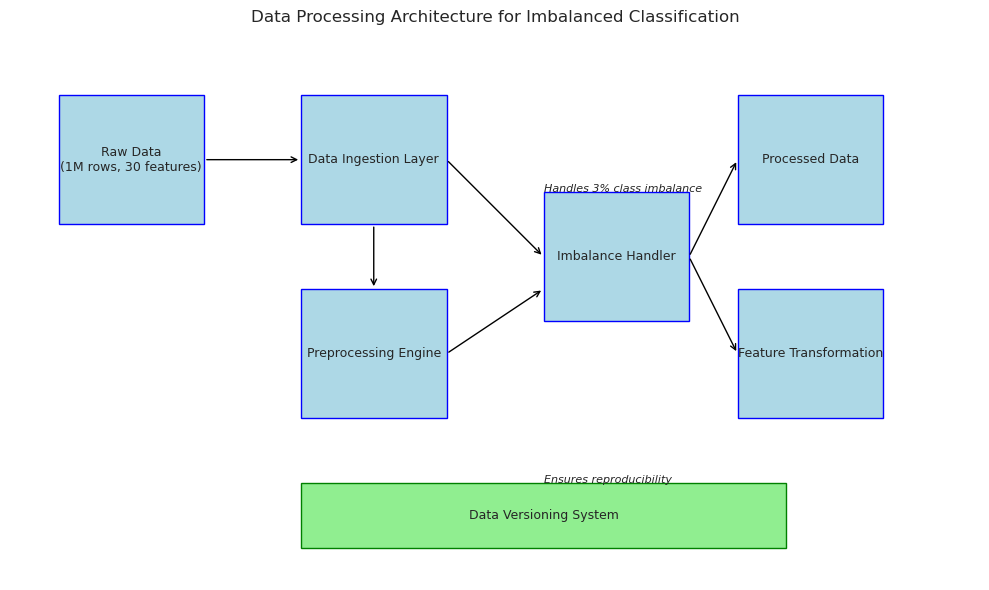

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a clean figure with plenty of space
fig, ax = plt.subplots(figsize=(10, 6))

# Component definitions with adjusted positions
components = [
    {"name": "Raw Data\n(1M rows, 30 features)", "position": [0.05, 0.55, 0.15, 0.2]},
    {"name": "Data Ingestion Layer", "position": [0.3, 0.55, 0.15, 0.2]},
    {"name": "Preprocessing Engine", "position": [0.3, 0.25, 0.15, 0.2]},
    {"name": "Imbalance Handler", "position": [0.55, 0.4, 0.15, 0.2]},
    {"name": "Feature Transformation", "position": [0.75, 0.25, 0.15, 0.2]},
    {"name": "Processed Data", "position": [0.75, 0.55, 0.15, 0.2]}
]

# Versioning component
versioning = {"name": "Data Versioning System", "position": [0.3, 0.05, 0.5, 0.1]}

# Draw each component box
for comp in components:
    x, y, w, h = comp["position"]
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='blue', facecolor='lightblue')
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, comp["name"], ha='center', va='center', fontsize=9)

# Draw the versioning box
x, y, w, h = versioning["position"]
rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='green', facecolor='lightgreen')
ax.add_patch(rect)
ax.text(x + w/2, y + h/2, versioning["name"], ha='center', va='center', fontsize=9)

# Define arrows using annotate for better control
arrows = [
    {"start": [0.2, 0.65], "end": [0.3, 0.65]},  # Raw to Ingest
    {"start": [0.375, 0.55], "end": [0.375, 0.45]},  # Ingest to Preprocess
    {"start": [0.45, 0.65], "end": [0.55, 0.5]},  # Ingest to Imbalance
    {"start": [0.45, 0.35], "end": [0.55, 0.45]},  # Preprocess to Imbalance
    {"start": [0.7, 0.5], "end": [0.75, 0.35]},  # Imbalance to Feature
    {"start": [0.7, 0.5], "end": [0.75, 0.65]},  # Imbalance to Processed
]

# Draw the arrows
for arrow in arrows:
    ax.annotate(
        '', xy=arrow["end"], xytext=arrow["start"],
        arrowprops=dict(arrowstyle='->', color='black')
    )

# Add title
plt.title('Data Processing Architecture for Imbalanced Classification', fontsize=12)

# Add minimal annotations
plt.text(0.55, 0.6, "Handles 3% class imbalance", fontsize=8, style='italic')
plt.text(0.55, 0.15, "Ensures reproducibility", fontsize=8, style='italic')

# Clean up the plot
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.85)
ax.axis('off')

# Apply tight layout
plt.tight_layout()
plt.show()


## 2.2 Imbalance Handling Strategy

Addressing the 3% positive class imbalance is critical for model performance. The system implements three complementary approaches that can be configured based on experimental needs:

### 1. Data-Level Approaches

These strategies directly modify the dataset distribution:

- **Undersampling**: Reduces majority class examples to create balanced training batches
  - *Benefits*: Reduces training time, focuses learning on decision boundary
  - *System Impact*: Requires less memory, enables faster iteration cycles
  - *Implementation*: Random or informed undersampling with configurable ratios

- **Oversampling**: Increases minority class representation through duplication or synthesis
  - *Benefits*: Preserves all majority class information
  - *System Impact*: Increased memory requirements, longer training time
  - *Implementation*: SMOTE and variants, with controllable neighborhood parameters

### 2. Algorithm-Level Approaches

These strategies adapt the learning process to handle imbalance:

- **Cost-Sensitive Learning**: Assigns higher misclassification costs to minority class
  - *Benefits*: Uses all data without modification
  - *System Impact*: Minimal preprocessing overhead, complexity shifts to model training
  - *Implementation*: Dynamic class weight calculation based on dataset statistics

### 3. Ensemble-Based Integration

Combines multiple models trained on different data distributions:

- *Benefits*: Improves robustness through diverse learning signals
- *System Impact*: Increased computational requirements, more complex inference
- *Implementation*: Parallel processing of differently sampled datasets, weighted voting

The system architecture allows these strategies to be applied individually or in combination, with parameters tracked through the versioning system for reproducibility.

## 2.3 Preprocessing Pipeline Design

The preprocessing pipeline is designed to handle the large-scale dataset efficiently while maintaining reproducibility. The architecture follows a modular design pattern that separates concerns and enables parallel processing where possible.

### Core Pipeline Components

1. **Data Validation Module**
   - Schema validation for 30-feature input
   - Statistical anomaly detection
   - Missing value identification
   - Ensures data quality before processing

2. **Feature Preprocessing Module**
   - Normalization/standardization for neural network optimization
   - Handling of missing values using configurable strategies
   - Outlier detection and treatment
   - Feature-specific transformations based on distribution analysis

3. **Feature Engineering Layer**
   - Automated feature interaction detection
   - Dimensionality reduction options (PCA, t-SNE)
   - Domain-specific transformations
   - Feature importance analysis to inform model design

### Scalability Considerations

- **Partitioned Processing**: Dataset is processed in configurable chunks to manage memory constraints
- **Caching Strategy**: Intermediate results cached to avoid redundant computation
- **Parallel Execution**: Independent transformations run concurrently where applicable
- **Resource Adaptation**: Processing scales based on available computational resources

### Reproducibility Framework

- **Parameter Tracking**: All preprocessing parameters are versioned and logged
- **Transformation Sequences**: Order of operations explicitly recorded
- **Random State Control**: Seed values fixed and documented for stochastic processes
- **Pipeline Serialization**: Complete pipeline state can be saved and restored
- **Execution Provenance**: Full history of data transformations maintained

This design enables efficient processing of the 1M rows while maintaining the ability to recreate exact preprocessing conditions for experimental validation and model deployment.